In [3]:
%cd C:\Users\charl\Documents\GitHub\charlesnchr-dev\pyengine\pysrc

C:\Users\charl\Documents\GitHub\charlesnchr-dev\pyengine\pysrc


In [1]:
import numpy as np
import io
from PIL import Image
import pickle

data = pickle.load(open('data.pkl','rb'))

In [4]:
len(data)

8390000

In [85]:
%%timeit

h = 2048
w = 2048
nch = 1
bytesPerPixel = 2 # MM parameter

npixels = h*w*bytesPerPixel

img = np.zeros((h,w,nch))

count = 0

for i in range(0,npixels,bytesPerPixel):
    
    pidx = i // bytesPerPixel
    row = pidx // w
    column = pidx % w
    if nch > 1:
        if ch == 0:    
            img[row,column,2] = data[i]
        elif ch == 1:
            img[row,column,1] = data[i]
        elif ch == 2:
            img[row,column,0] = data[i]
    else:
        img[row,column,0] = 256*data[i] + data[i+1]

2 s ± 6.26 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


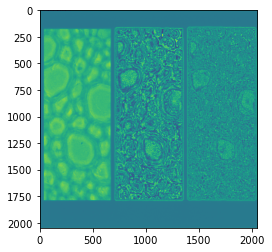

In [76]:
import matplotlib.pyplot as plt

plt.imshow(img[:,:,0])
plt.show()

In [24]:
len(data[::2][:h*w*nch])

4194304

In [42]:
data2 = np.frombuffer(data,dtype='uint8')

In [46]:
data2

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [83]:
%%timeit
arr1 = np.reshape(data2[::2][:h*w*nch],(h,w,nch))
arr2 = np.reshape(data2[1::2][:h*w*nch],(h,w,nch))
comb_arr = 256*arr1 + arr2

10.5 ms ± 46.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


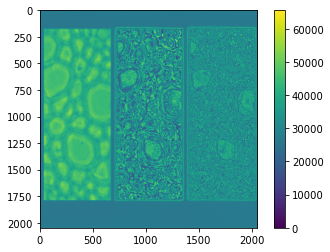

In [84]:
plt.imshow(comb_arr[:,:,0])
plt.colorbar()
plt.show()

In [64]:
np.min(comb_arr),n

(0, 65535)